In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
input_path = './data/014.mp4'
video1 = cv2.VideoCapture(input_path)

In [73]:
with open('darknet/cfg/coco.names') as f:
    labels = [line.strip() for line in f]
network = cv2.dnn.readNet('darknet/cfg/yolov3.weights', 'darknet/cfg/yolov3.cfg')
ln = network.getLayerNames()
ln = [ln[i-1] for i in network.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(labels), 3))

In [78]:

video1.set(cv2.CAP_PROP_POS_FRAMES, 0)

True

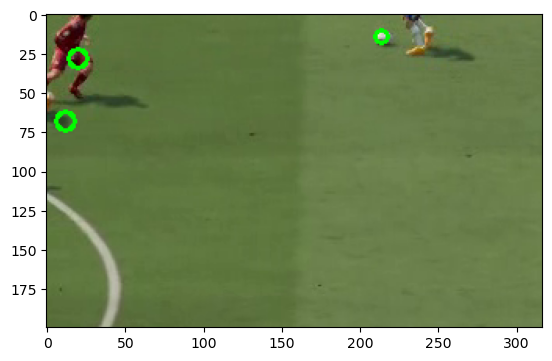

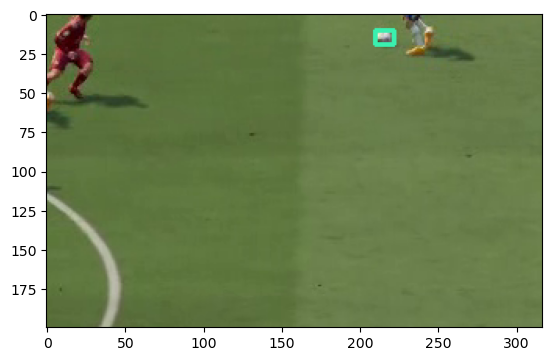

In [162]:
while True:
    ret, frame = video1.read()
    frame = frame[300:500, 750:1067]

    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask_ground = cv2.inRange(frame_hsv, np.array([0,0,0]), np.array([255,60,255]))
    # plt.imshow(cv2.cvtColor(mask_ground))
    # plt.imshow(mask_ground, cmap='gray')
    # plt.show()
    plt.figure()
    
    hframe = frame.copy()
    gframe = cv2.cvtColor(hframe, cv2.COLOR_BGR2GRAY)
    # gframe = cv2.medianBlur(gframe, 5)
    circles = cv2.HoughCircles(gframe, cv2.HOUGH_GRADIENT, 1, 9, param1=50, param2=10, minRadius=3, maxRadius=9)
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        cv2.circle(hframe, (i[0], i[1]), i[2], (0,255,0), 2)
        continue
    plt.imshow(cv2.cvtColor(hframe, cv2.COLOR_BGR2RGB))
    plt.show()
    # plt.imshow(gframe)

    plt.figure()
    SPORTS_BALL = 32
    height, width = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1/255., (416, 416), swapRB=True, crop=False)
    network.setInput(blob)
    output_from_network = network.forward(ln)
    boxes=[]
    confidences = []
    for out in output_from_network:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            if class_id != SPORTS_BALL: continue
            confidence = scores[class_id]
            if confidence>0.1:
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int((detection[0] - detection[2]/2) * width)
                y = int((detection[1] - detection[3]/2) * height)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    boxes = np.asarray(boxes)[indexes]
    for i, box in enumerate(boxes):
        x, y, w, h = box
        color = colors[i]
        cv2.rectangle(frame, (x,y), (x+w, y+h), color, 2)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()
    break